In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
import missingno as msno

In [3]:
training_set = pd.read_csv("/Users/polina/PycharmProjects/recommendation_system/recommendation-system/data/external/training_set/log_mini.csv")

In [4]:
training_set.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [5]:
training_set.shape

(167880, 21)

In [6]:
training_set.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_1                               bool
skip_2                               bool
skip_3                               bool
not_skipped                          bool
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle        bool
hour_of_day                         int64
date                               object
premium                              bool
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

In [13]:
training_set["skip_1"] = training_set["skip_1"].astype(int)
training_set["skip_2"] = training_set["skip_2"].astype(int)
training_set["skip_3"] = training_set["skip_3"].astype(int)
training_set["not_skipped"] = training_set["not_skipped"].astype(int)
training_set["hist_user_behavior_is_shuffle"] = training_set["hist_user_behavior_is_shuffle"].astype(int)
training_set["premium"] = training_set["premium"].astype(int)

In [14]:
training_set[training_set.duplicated()]

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end


In [15]:
training_set.isna().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64

In [16]:
training_set.describe()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.421503,0.517179,0.648380,0.332881,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,0.308732,14.193084,0.810418
std,5.457638,3.422025,0.493801,0.499706,0.477478,0.471246,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,0.461972,5.996243,0.391971
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000
50%,9.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000
75%,14.000000,20.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,1.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,1.000000,23.000000,1.000000


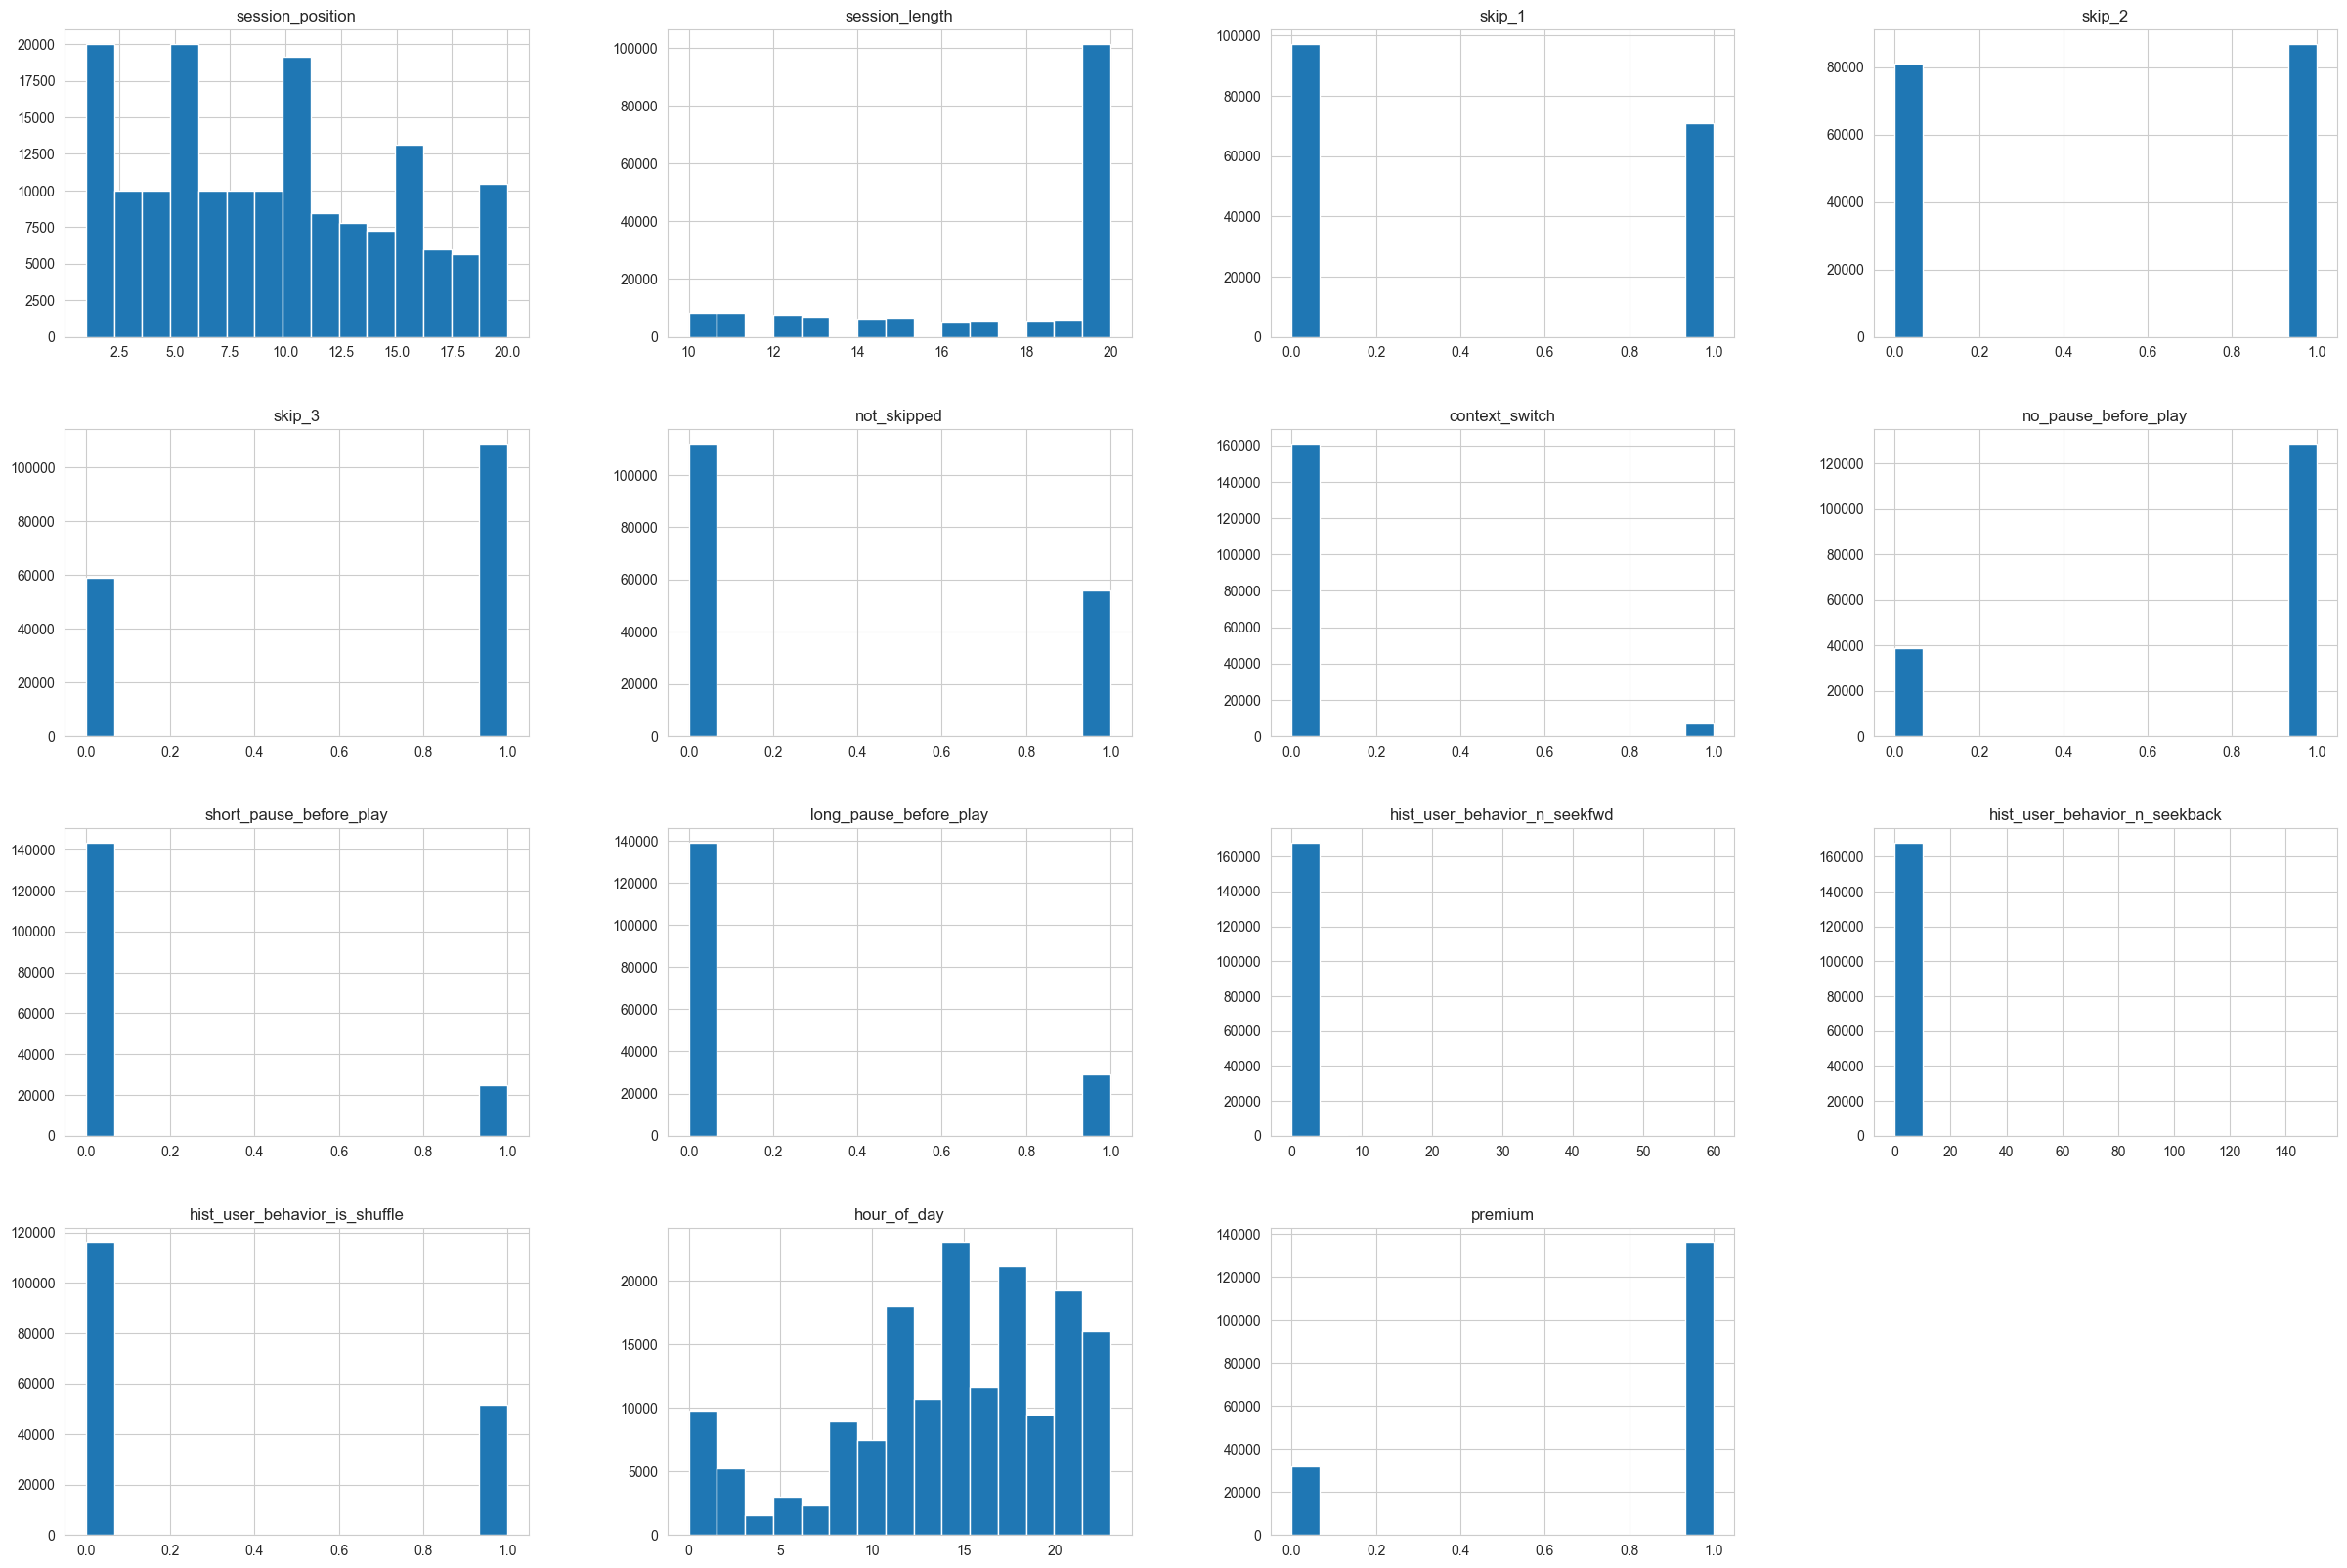

In [17]:
training_set.hist(figsize=(30,20),bins = 15)
plt.title("Features Distribution")
plt.show()

In [18]:
numeric_features = training_set.select_dtypes(include=[np.number])

numeric_features.columns

Index(['session_position', 'session_length', 'skip_1', 'skip_2', 'skip_3',
       'not_skipped', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'premium'],
      dtype='object')

In [19]:
categorical_features = training_set.select_dtypes(include=[object])

categorical_features.columns

Index(['session_id', 'track_id_clean', 'date', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [20]:
numeric_features.skew(), numeric_features.kurt()

(session_position                   0.250537
 session_length                    -1.093022
 skip_1                             0.317931
 skip_2                            -0.068757
 skip_3                            -0.621523
 not_skipped                        0.709275
 context_switch                     4.635773
 no_pause_before_play              -1.267181
 short_pause_before_play            1.997894
 long_pause_before_play             1.730598
 hist_user_behavior_n_seekfwd      53.436156
 hist_user_behavior_n_seekback    122.850478
 hist_user_behavior_is_shuffle      0.828058
 hour_of_day                       -0.699712
 premium                           -1.583901
 dtype: float64,
 session_position                    -1.007060
 session_length                      -0.388547
 skip_1                              -1.898942
 skip_2                              -1.995296
 skip_3                              -1.613729
 not_skipped                         -1.496947
 context_switch           

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

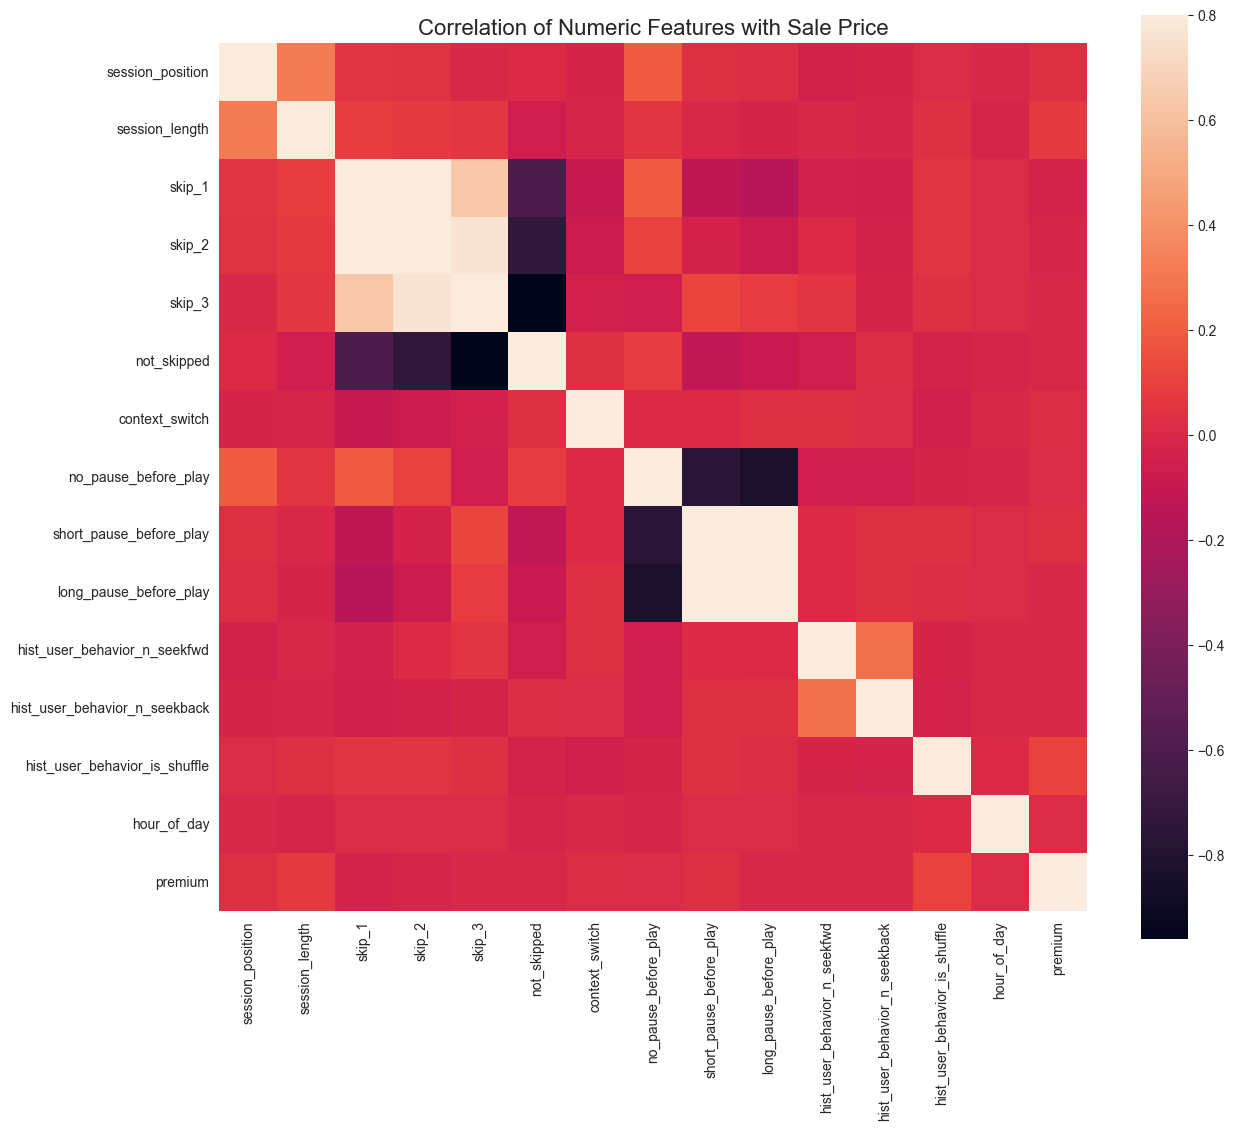

In [21]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)

correlation = numeric_features.corr()
sns.heatmap(correlation,square = True,  vmax=0.8)

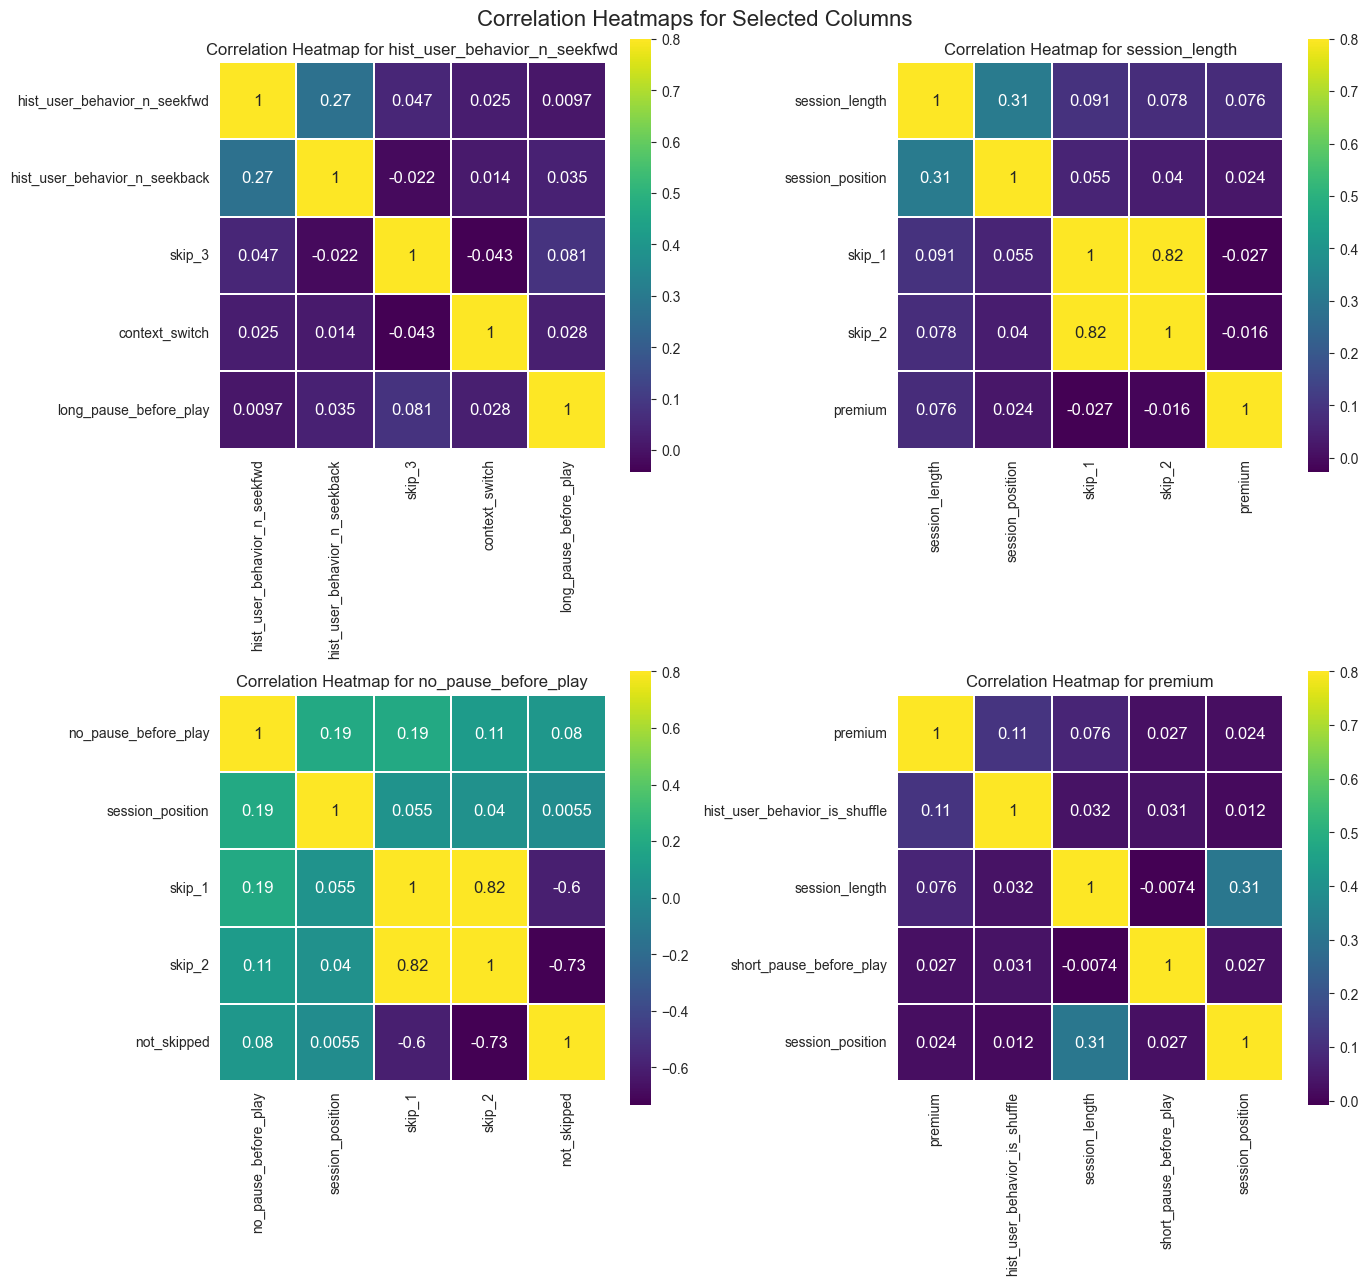

In [23]:
# Define the columns you want to analyze
columns_to_analyze = ['hist_user_behavior_n_seekfwd', 'session_length', 'no_pause_before_play', 'premium']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 13))
fig.suptitle('Correlation Heatmaps for Selected Columns', fontsize=16)

for i, column in enumerate(columns_to_analyze):
    row = i // 2
    col = i % 2

    # Get the top correlated columns for the current column
    k = 5
    cols = correlation.nlargest(k, column)[column].index
    cm = np.corrcoef(training_set[cols].values.T)

    # Create a heatmap in the current subplot
    sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
                linecolor="white", xticklabels=cols.values, annot_kws={'size': 12},
                yticklabels=cols.values, ax=axs[row, col])
    
    axs[row, col].set_title(f'Correlation Heatmap for {column}', fontsize=12)
    axs[row, col].label_outer()

# Adjust subplot layout
plt.tight_layout()
plt.show()